#ALL in one

In [154]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

#import data to the program (features and labels)
csv_file_path = r"output_file.csv"
df = pd.read_csv(csv_file_path)
# print(df.head())


In [155]:
def evaluate_model(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    error = (fp + fn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    print("Confusion Matrix:")
    print(confusion_mat)
    print()
    print("Accuracy:", accuracy)
    print("Error:", error)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

In [156]:
# Drop samples with empty or -inf or inf values
# Also drop samples which has at least a feature thas is not valid

df = df.replace([np.inf, -np.inf , '#NAME?'], np.nan)  # Replace -inf values with NaN
# Drop samples with NaN values
df = df.dropna()

X = df.drop('y_real_fake_uncleaned', axis=1)
y = df['y_real_fake_uncleaned']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_old = X_train
X_train= X_train.drop(['y_category_uncleaned',"image_name"], axis=1)
X_test_old = X_test
X_test= X_test.drop(['y_category_uncleaned',"image_name"], axis=1)


decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train, y_train)
y_pred = decisionTreeClassifier.predict(X_test)
evaluate_model(y_test, y_pred)


Confusion Matrix:
[[385  63]
 [ 68 423]]

Accuracy: 0.8604898828541001
Error: 0.1395101171458999
Precision: 0.8703703703703703
Recall: 0.8615071283095723
F1-Score: 0.8659160696008189


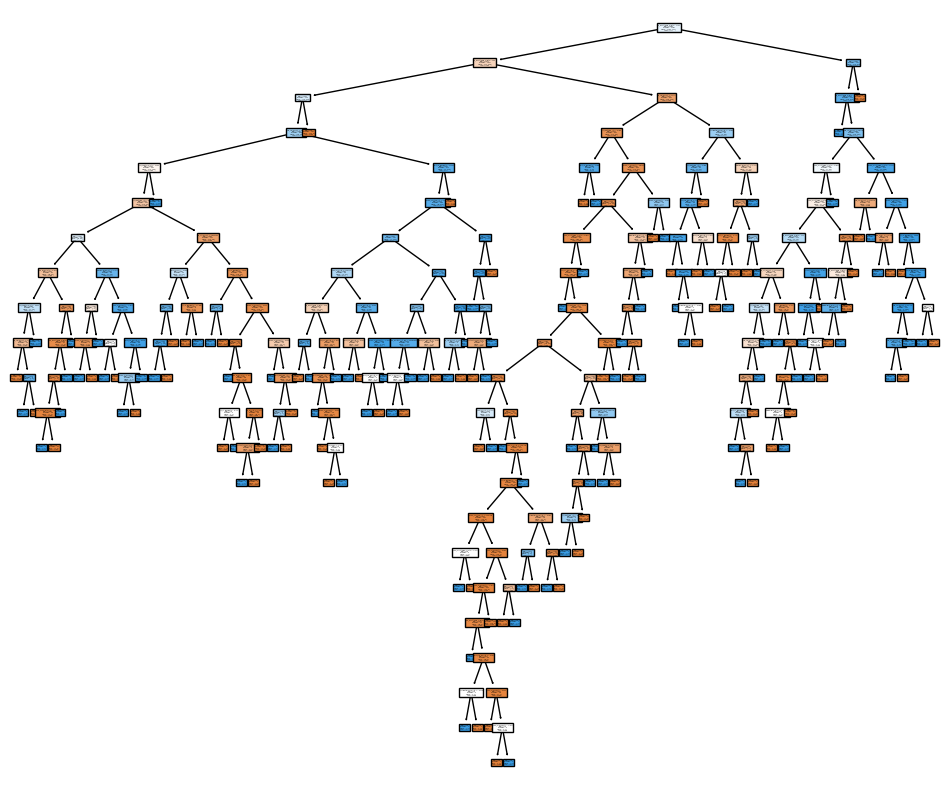

In [158]:
# Visualize the decision tree
fig = plt.figure(figsize=(12, 10))
_ = tree.plot_tree(decisionTreeClassifier, feature_names=X.columns, class_names=decisionTreeClassifier.classes_, filled=True)
plt.show()

decision tree limited to max depth of 3

In [159]:
limitedDecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy",max_depth=3)
limitedDecisionTreeClassifier.fit(X_train, y_train)
y_pred = limitedDecisionTreeClassifier.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix:
[[302 146]
 [ 61 430]]

Accuracy: 0.7795527156549521
Error: 0.22044728434504793
Precision: 0.7465277777777778
Recall: 0.8757637474541752
F1-Score: 0.8059981255857546


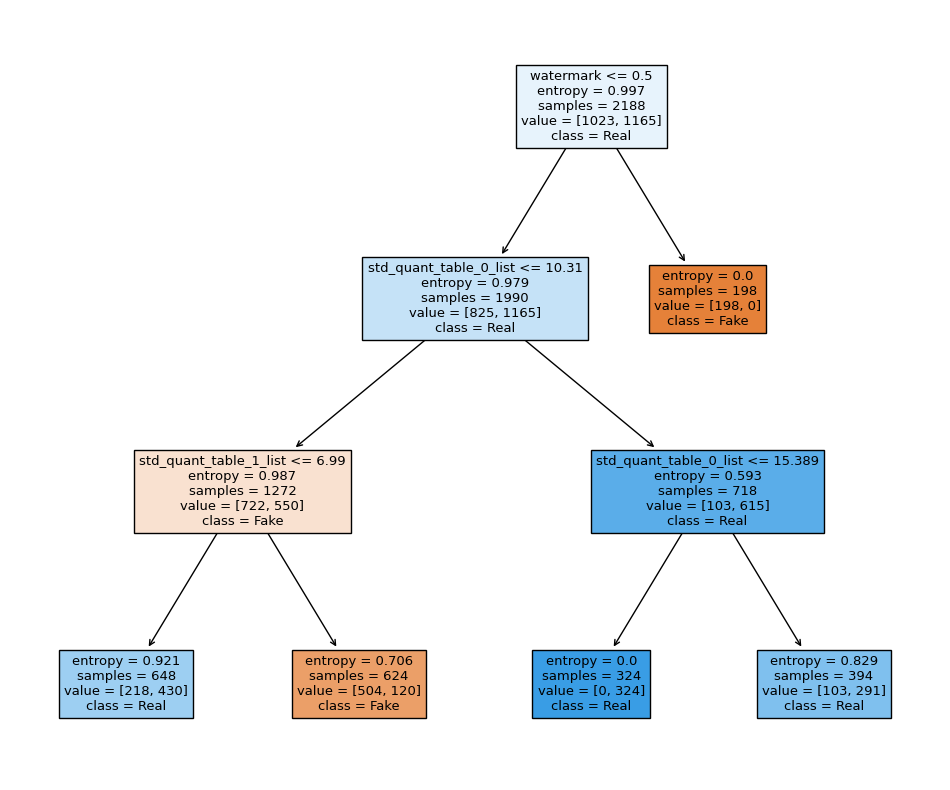

In [160]:
# Visualize the decision tree
fig = plt.figure(figsize=(12, 10))
_ = tree.plot_tree(limitedDecisionTreeClassifier, feature_names=X.columns, class_names=limitedDecisionTreeClassifier.classes_, filled=True)
plt.show()

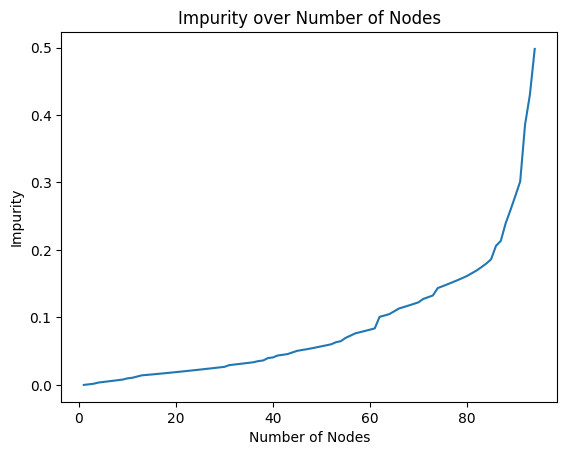

In [161]:


# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier and obtain the impurity values
decision_tree.fit(X_train, y_train)
impurities = decision_tree.cost_complexity_pruning_path(X_train, y_train).impurities

# Plot the impurity values over the number of nodes
num_nodes = np.arange(1, len(impurities) + 1)
plt.plot(num_nodes, impurities)
plt.xlabel('Number of Nodes')
plt.ylabel('Impurity')
plt.title('Impurity over Number of Nodes')
plt.show()


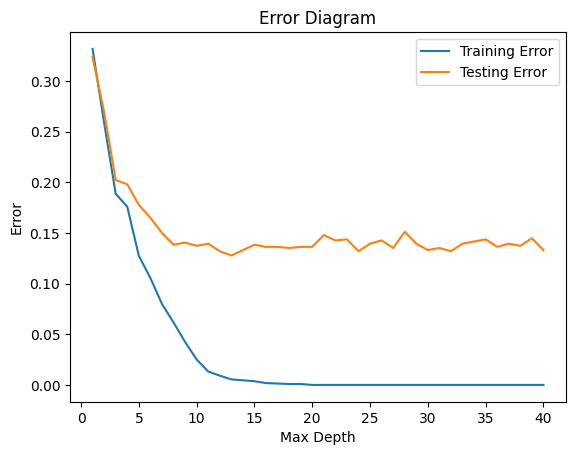

In [162]:

# Track error values
max_depth_values = range(1, 41)
train_errors = []
test_errors = []
# Train and evaluate the Decision Tree for different max_depth values
for max_depth in max_depth_values:
    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Calculate training and testing error
    train_error = 1 - clf.score(X_train, y_train)
    test_error = 1 - clf.score(X_test, y_test)

    # Append error values to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the error diagram
plt.plot(max_depth_values, train_errors, label='Training Error')
plt.plot(max_depth_values, test_errors, label='Testing Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error Diagram')
plt.legend()
plt.show()


In [163]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=X.drop(['y_category_uncleaned',"image_name"], axis=1)
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create an SVM classifier
SVMclassifier = SVC() #default value of C is 1.0

# Train the model on the training data
SVMclassifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = SVMclassifier.predict(X_test)

evaluate_model(y_test, y_pred)

Confusion Matrix:
[[293  25]
 [ 40 268]]

Accuracy: 0.8961661341853036
Error: 0.10383386581469649
Precision: 0.9146757679180887
Recall: 0.8701298701298701
F1-Score: 0.8918469217970049


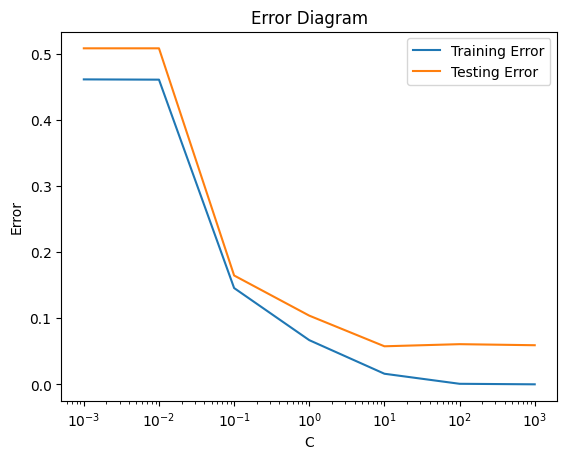

In [164]:
# Track error values
C_values = np.logspace(-3, 3, num=7)  # Range of C values to explore
train_errors = []
test_errors = []

# Train and evaluate the SVM for different C values
for C in C_values:
    # Create an SVM classifier
    svm = SVC(C=C)

    # Train the classifier
    svm.fit(X_train, y_train)

    # Calculate training and testing error
    train_error = 1 - svm.score(X_train, y_train)
    test_error = 1 - svm.score(X_test, y_test)

    # Append error values to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the error diagram
plt.semilogx(C_values, train_errors, label='Training Error')
plt.semilogx(C_values, test_errors, label='Testing Error')
plt.xlabel('C')
plt.ylabel('Error')
plt.title('Error Diagram')
plt.legend()
plt.show()

In [165]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix:
[[284  34]
 [ 31 277]]

Accuracy: 0.8961661341853036
Error: 0.10383386581469649
Precision: 0.8906752411575563
Recall: 0.8993506493506493
F1-Score: 0.8949919224555735


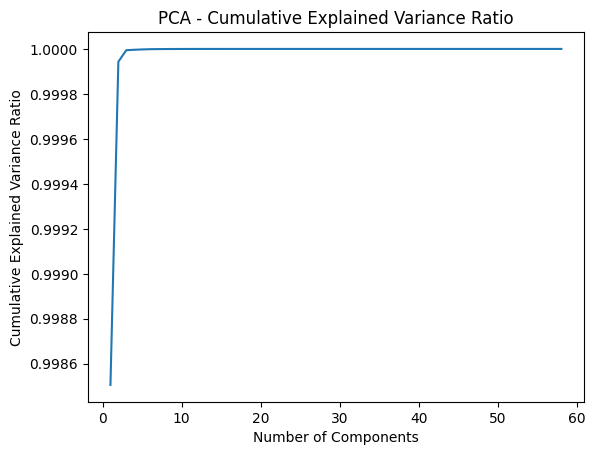

In [166]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()

In [167]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kneed in c:\python310\lib\site-packages (0.8.3)



In [168]:

from kneed import KneeLocator

kl = KneeLocator(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, curve='convex', direction='decreasing')
elbow_point = kl.elbow

print("Elbow Point:", elbow_point)

Elbow Point: 2


In [169]:
pca = PCA(n_components=35)  # Set the desired number of components
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Initialize the SVM classifier
svm = SVC()

# Fit the classifier to the reduced training data
svm.fit(X_train_reduced, y_train)

# Make predictions on the reduced testing data
y_pred = svm.predict(X_test_reduced)

evaluate_model(y_test, y_pred)

Confusion Matrix:
[[288  30]
 [ 43 265]]

Accuracy: 0.8833865814696485
Error: 0.11661341853035144
Precision: 0.8983050847457628
Recall: 0.8603896103896104
F1-Score: 0.8789386401326701


In [170]:
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
K = 2
kmeans = KMeans(n_clusters=K,n_init='auto')
cluster_labels = kmeans.fit_predict(X_normalized)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, cluster_labels, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred)


Confusion Matrix:
[[595  25]
 [ 19 300]]

Accuracy: 0.9531416400425985
Error: 0.046858359957401494
Precision: 0.9230769230769231
Recall: 0.9404388714733543
F1-Score: 0.9316770186335405


In [171]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Scale/normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an Agglomerative Clustering object
agg_clustering = AgglomerativeClustering(n_clusters=2)  # Adjust the number of clusters as needed

# Perform clustering
cluster_labels = agg_clustering.fit_predict(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_labels, test_size=0.3, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate_model(y_test, y_pred)


Confusion Matrix:
[[643  43]
 [ 44 209]]

Accuracy: 0.9073482428115016
Error: 0.0926517571884984
Precision: 0.8293650793650794
Recall: 0.8260869565217391
F1-Score: 0.8277227722772277


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

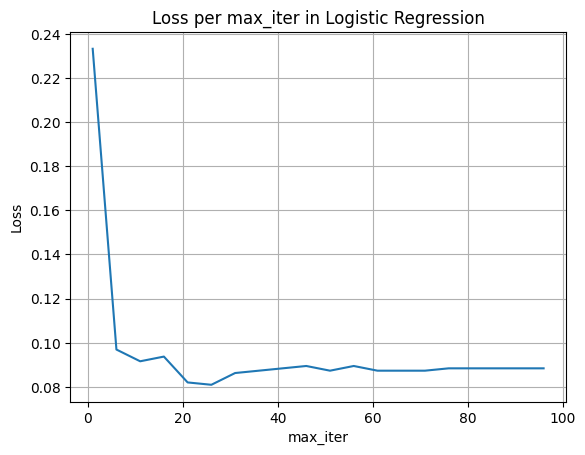

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# Initialize an instance of Logistic Regression
lr = LogisticRegression()

# Create an array of max_iter values to test
max_iters = np.arange(1, 100, 5)

losses = []  # To store the loss for each max_iter

# Fit the model and calculate loss for each max_iter value
for max_iter in max_iters:
    lr.set_params(max_iter=max_iter)  # Set the max_iter parameter
    lr.fit(X_train, y_train)  # Fit the logistic regression model
    y_pred = lr.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    error = (fp + fn) / (tp + tn + fp + fn)
    losses.append(error)


# Plotting the loss per max_iter
plt.plot(max_iters, losses)
plt.xlabel('max_iter')
plt.ylabel('Loss')
plt.title('Loss per max_iter in Logistic Regression')
plt.grid(True)
plt.show()


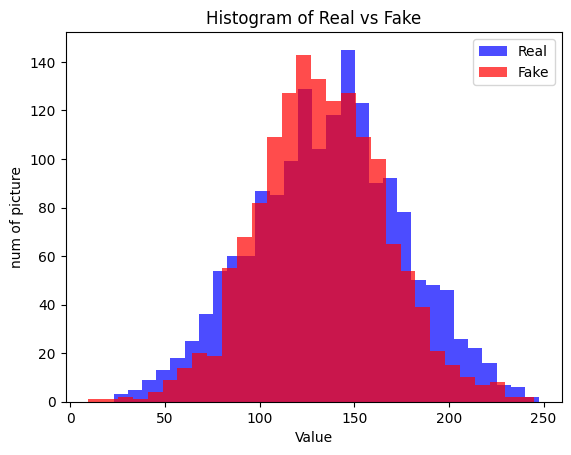

In [173]:
import matplotlib.pyplot as plt
X_set, y_set = X['Value'].tolist(),y.tolist()
feature ="Value"


def plot_histogram(X_set, y_set ,feature):
    real_values = []
    fake_values = []
    # Separate the real and fake values from y_set
    for i in range(len(X_set)):
        if y_set[i] == 'Fake':
            fake_values.append(X_set[i])
        elif y_set[i] == 'Real':
            real_values.append(X_set[i])

    # Plot the histogram
    plt.hist(real_values, bins=30, color='blue', label='Real', alpha=0.7)
    plt.hist(fake_values, bins=30, color='red', label='Fake', alpha=0.7)

    plt.xlabel(feature)
    plt.ylabel("num of picture")
    plt.title('Histogram of Real vs Fake')
    plt.legend()
    plt.show()

# Assuming you have X_set and y_set as lists
# Call the function with your X_set and y_set
plot_histogram(X_set, y_set ,feature)


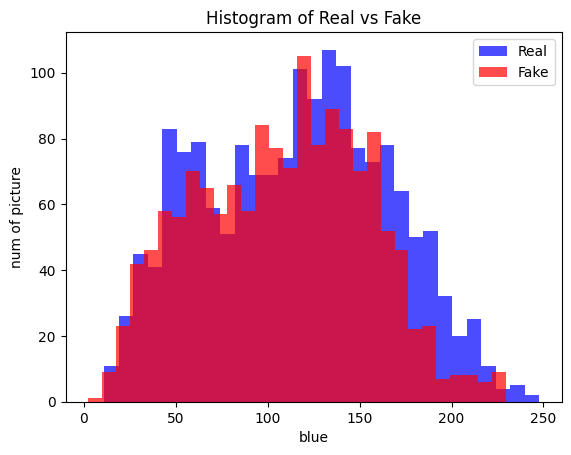

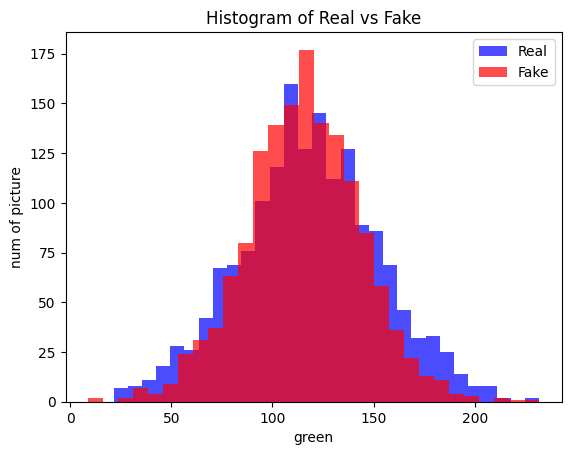

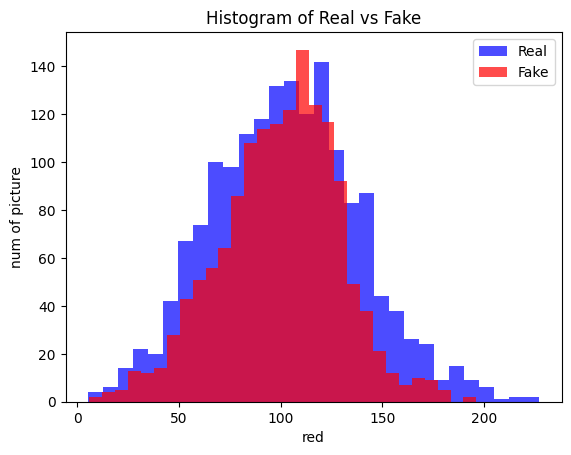

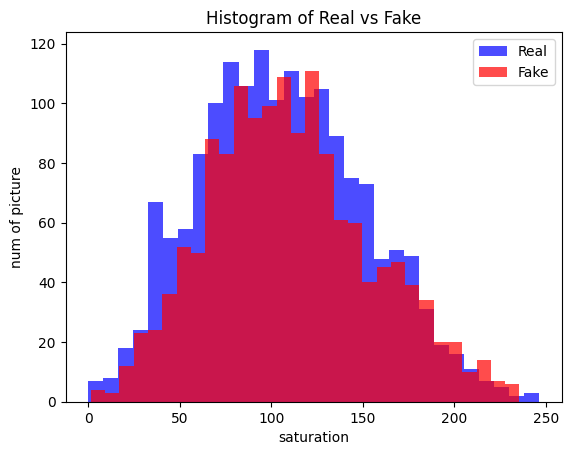

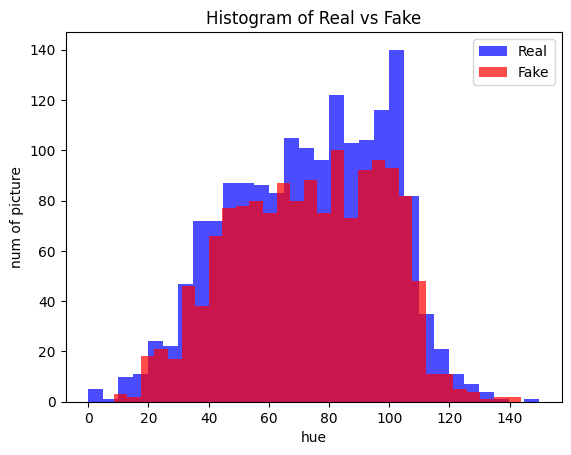

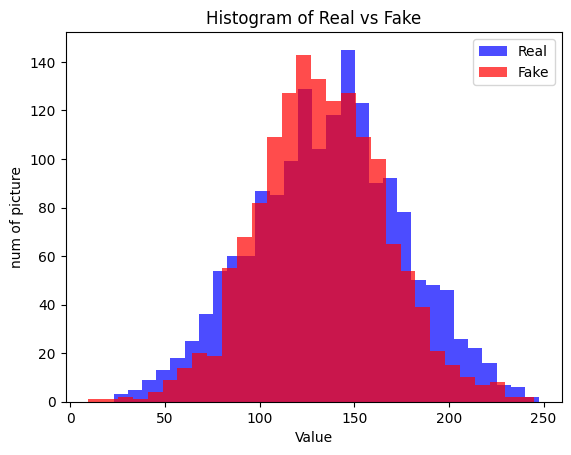

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Skipped invalid feature = watermark


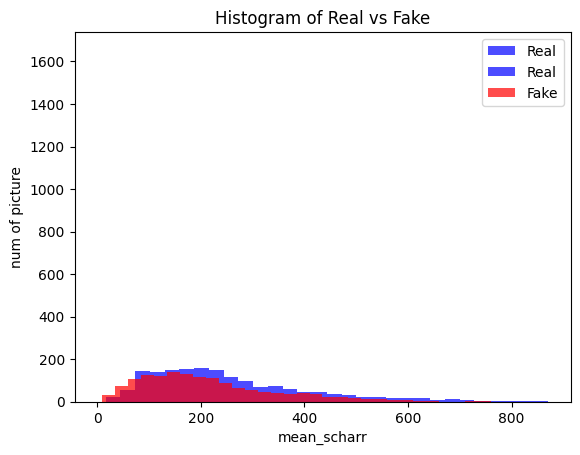

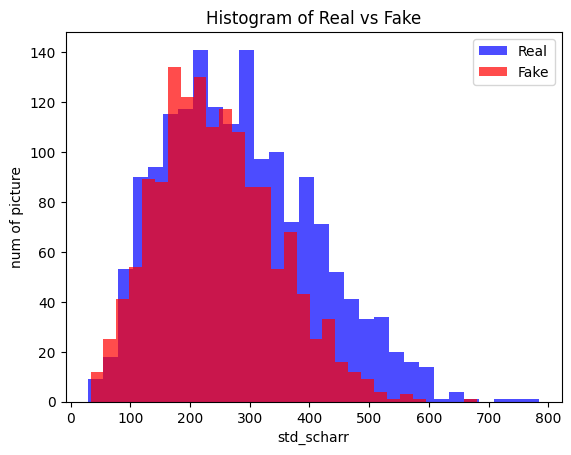

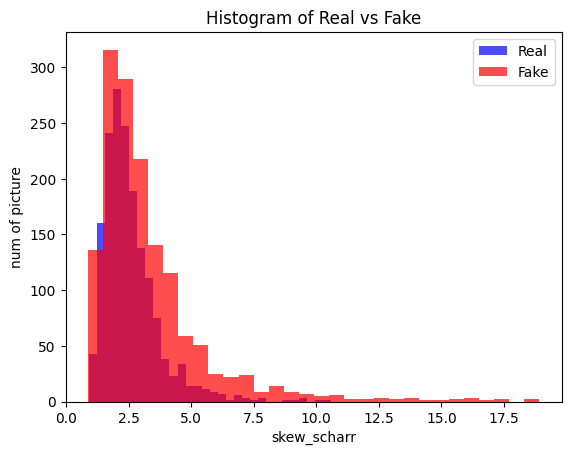

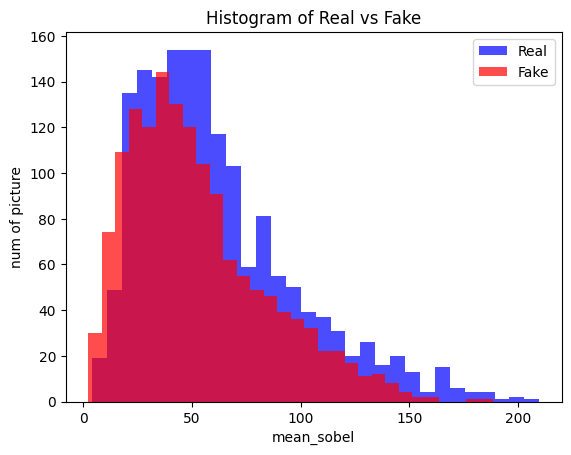

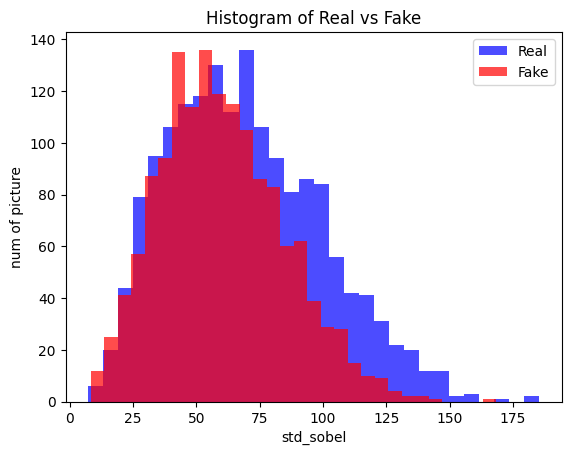

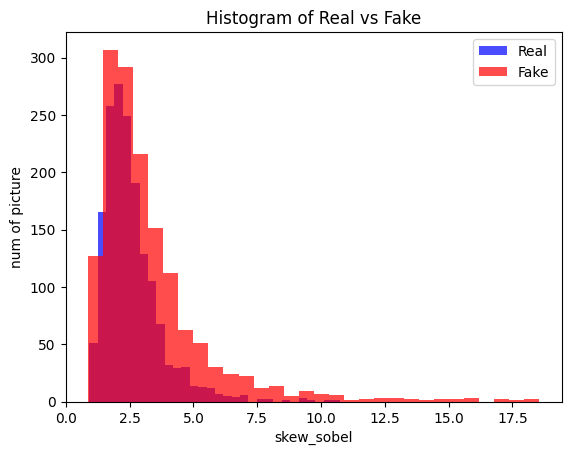

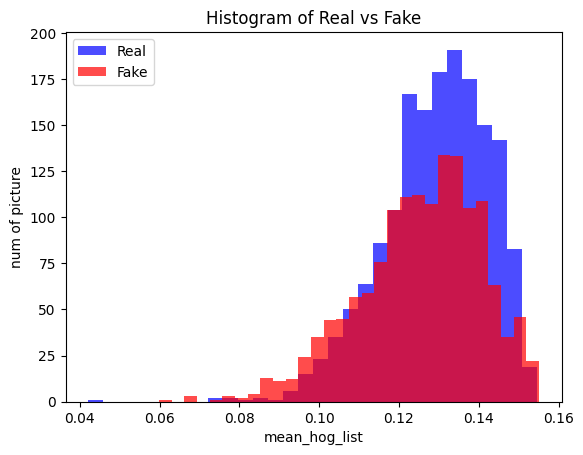

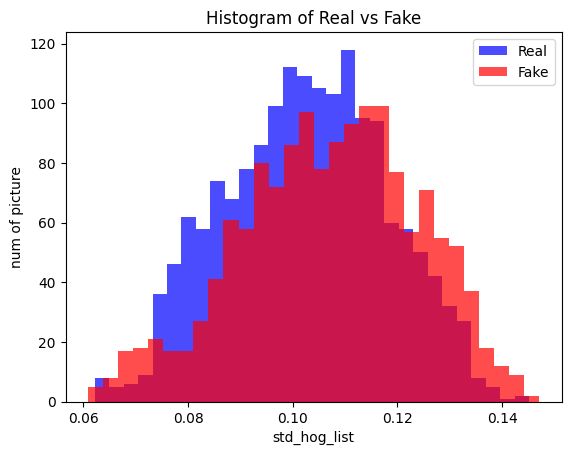

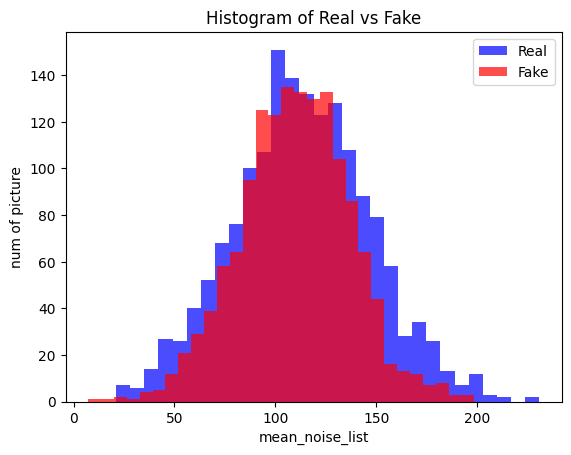

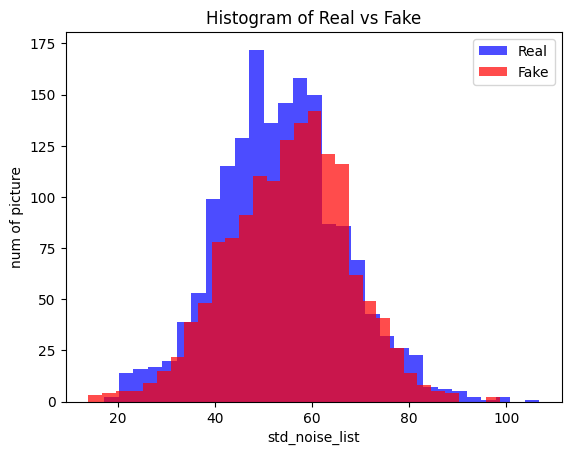

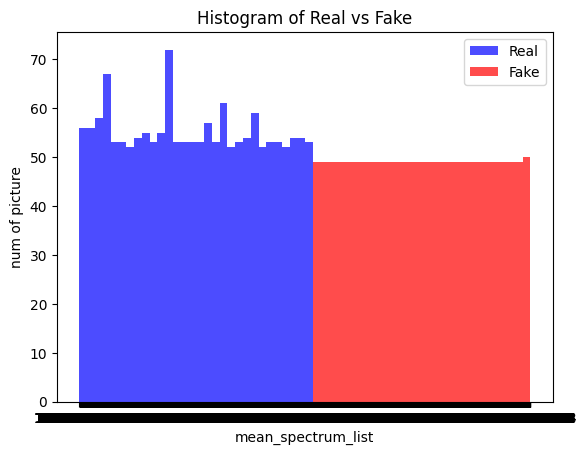

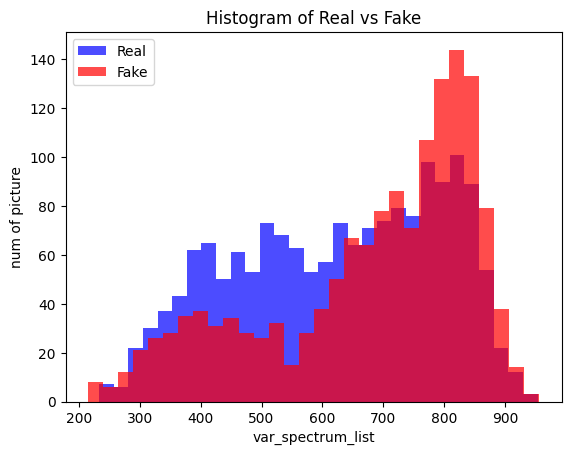

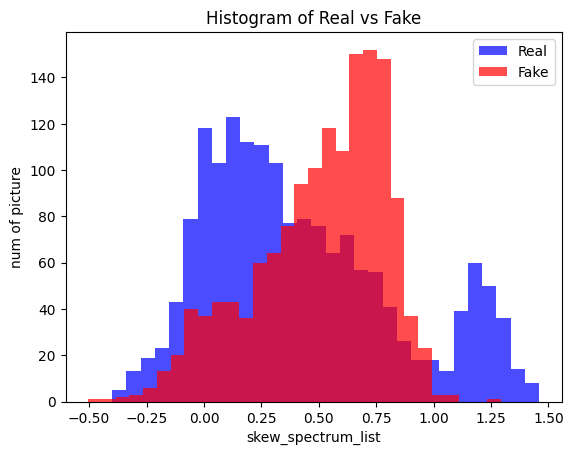

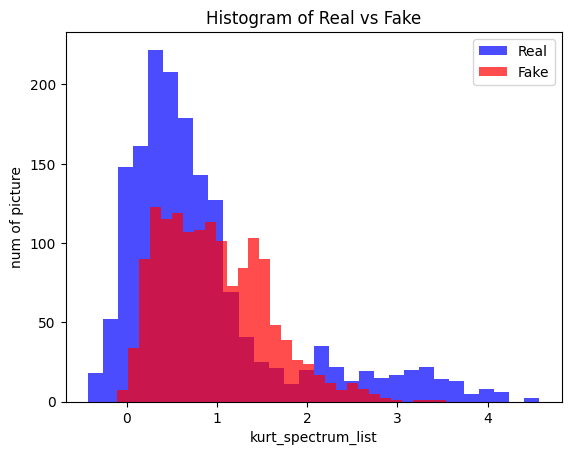

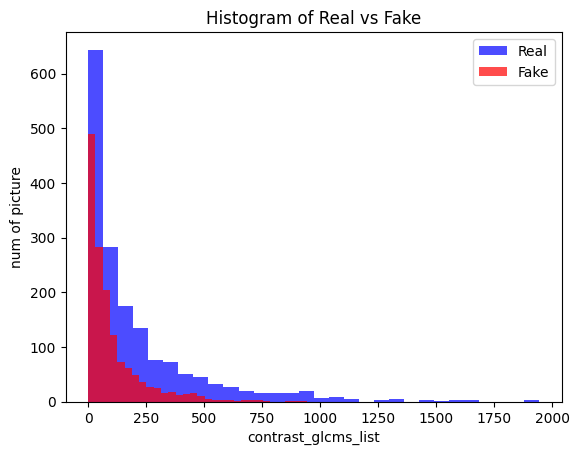

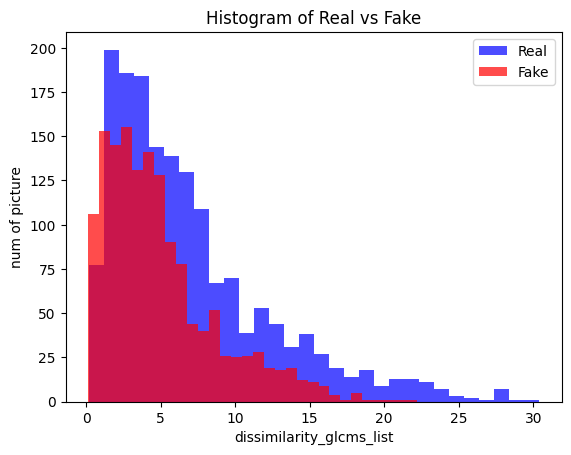

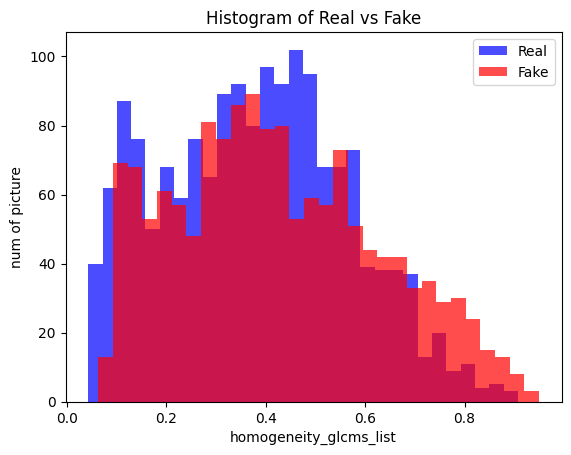

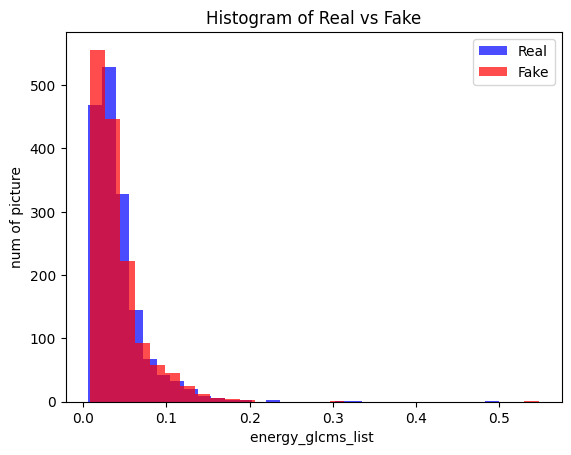

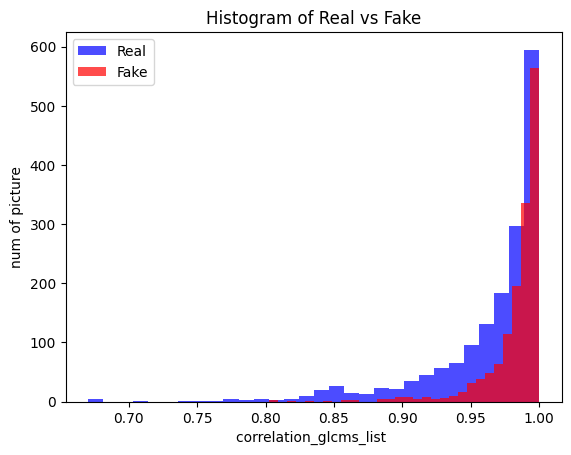

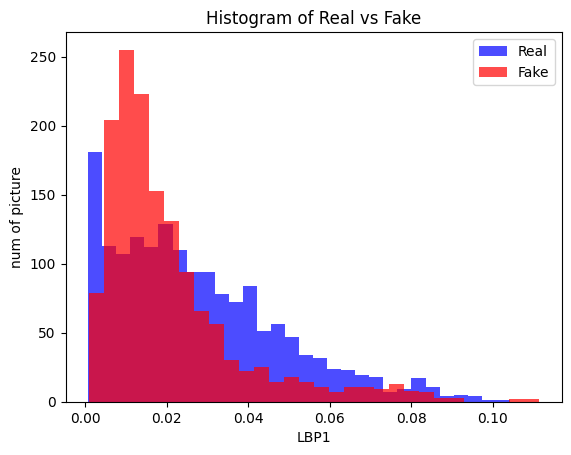

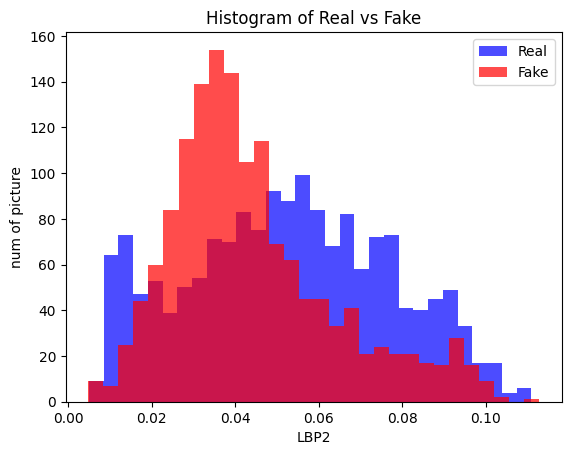

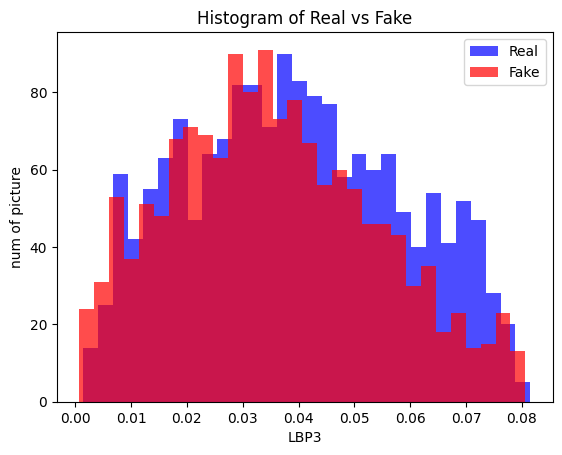

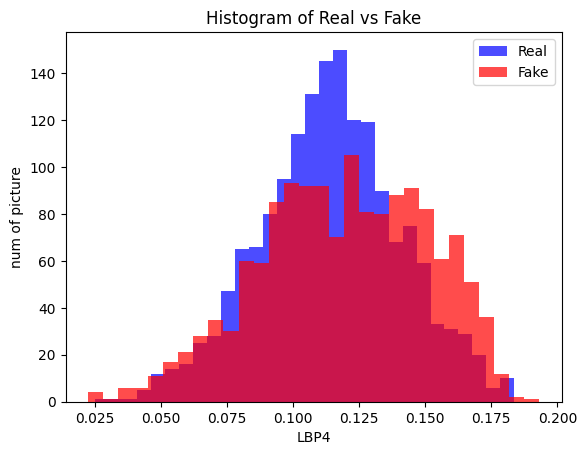

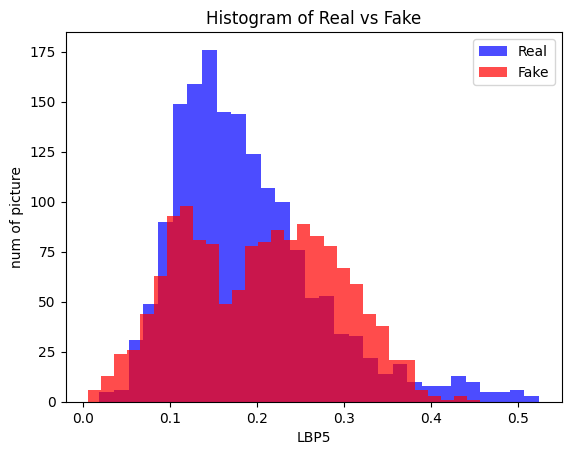

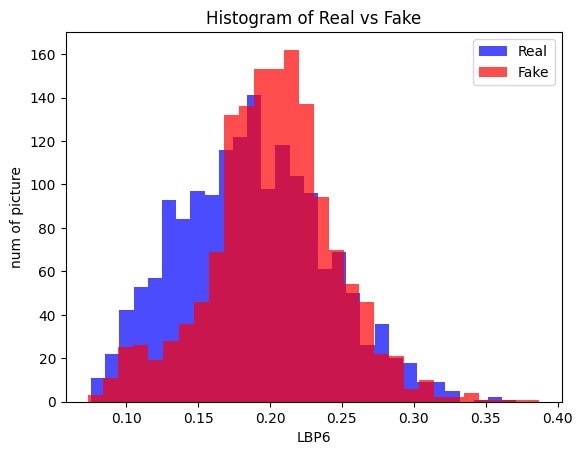

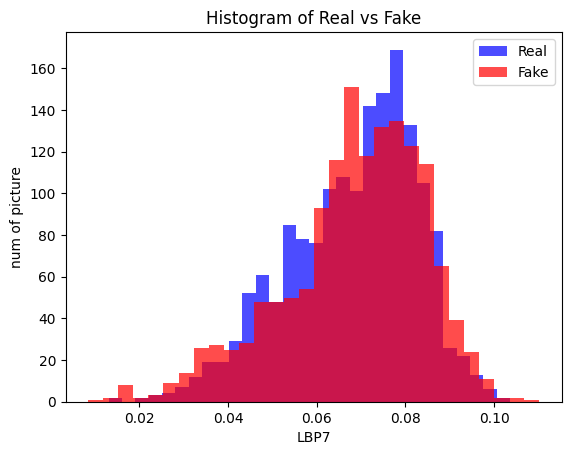

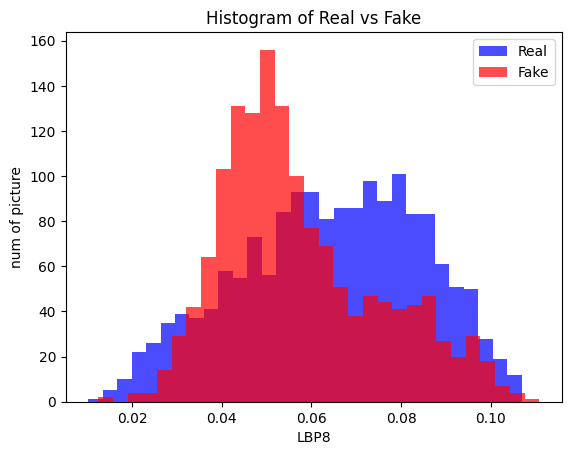

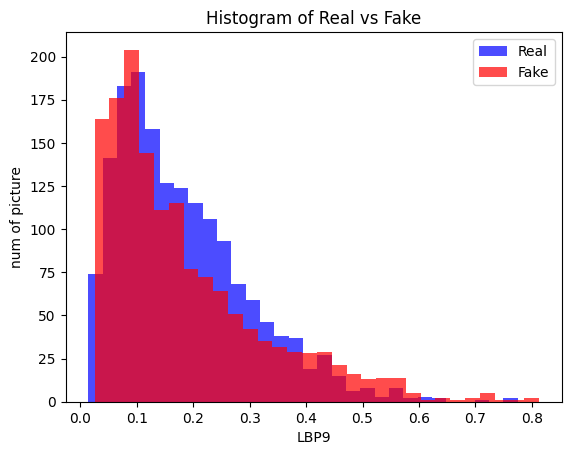

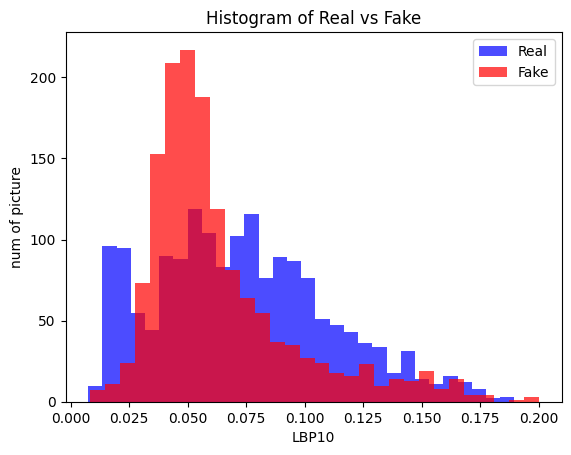

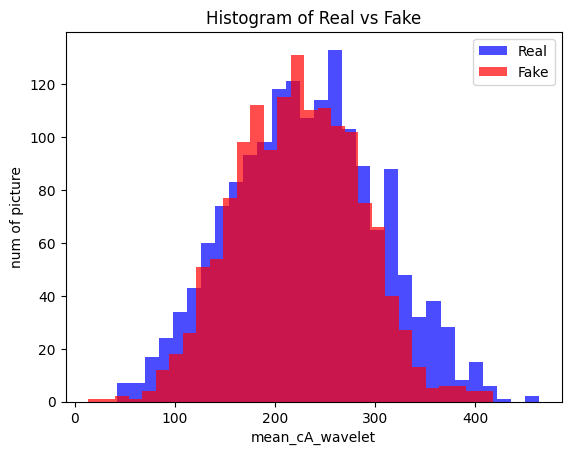

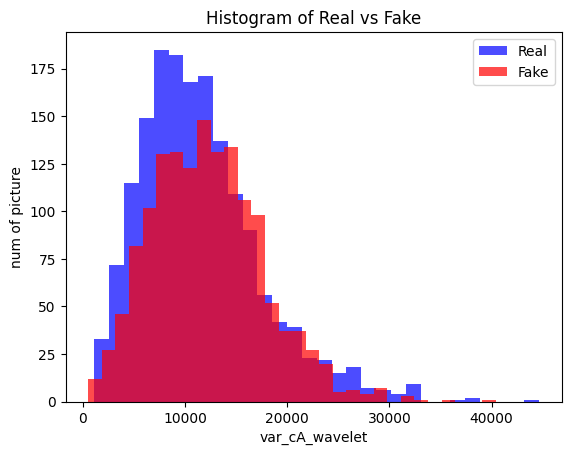

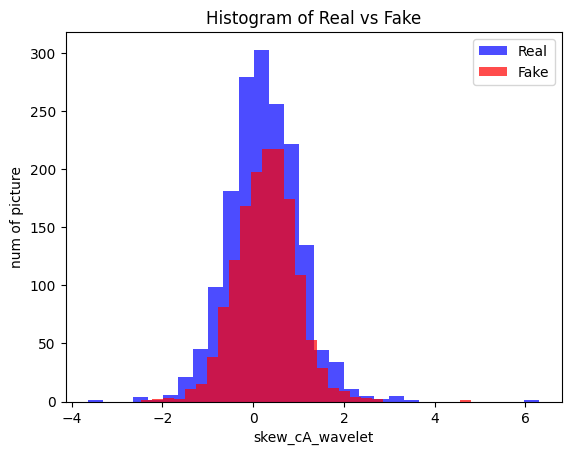

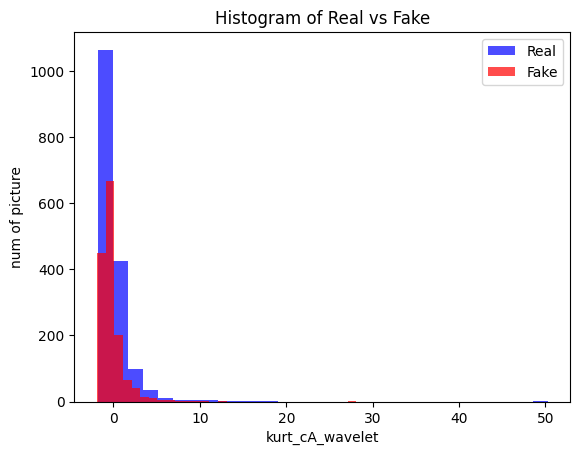

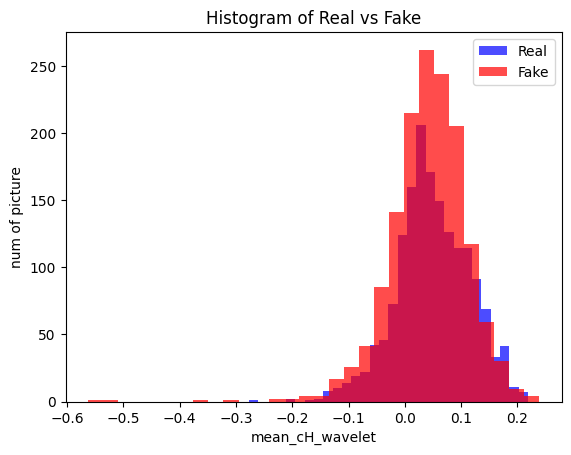

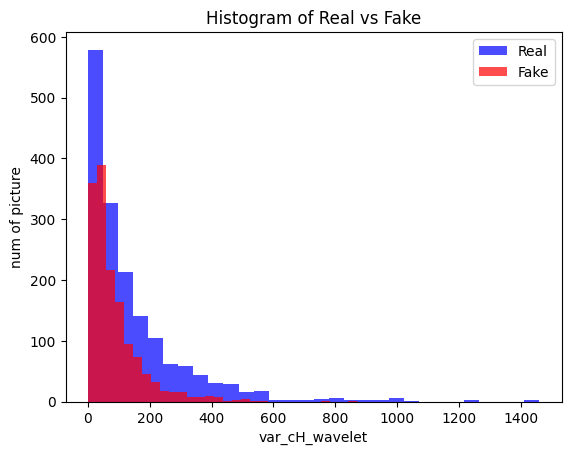

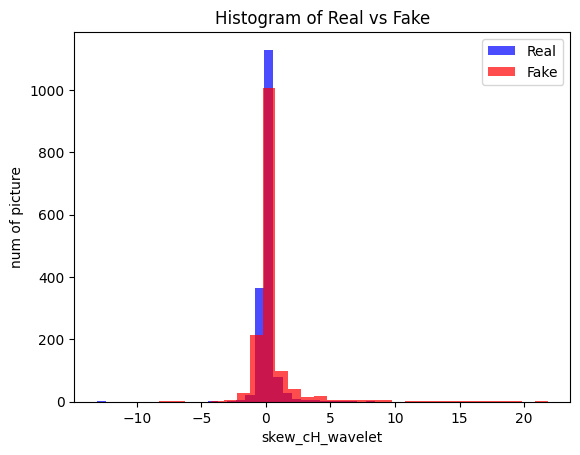

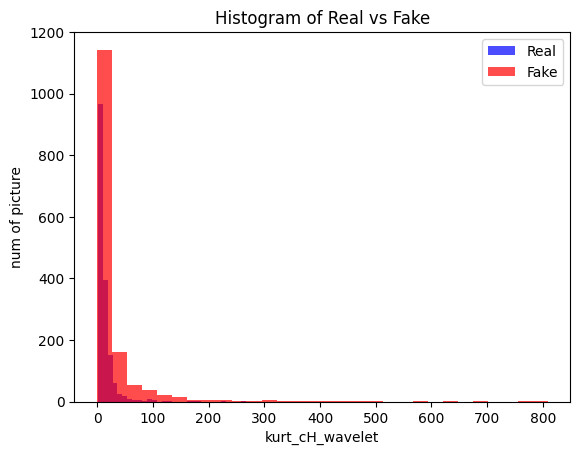

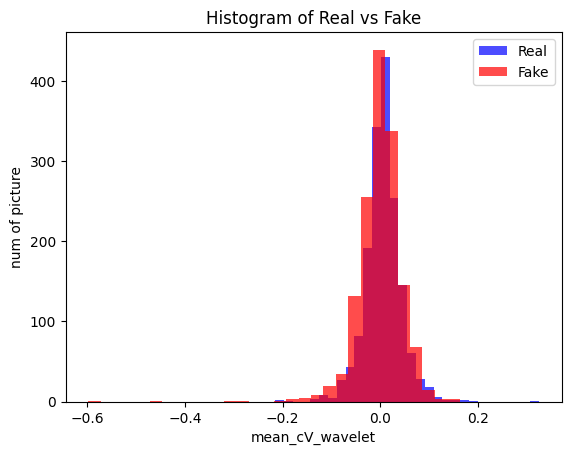

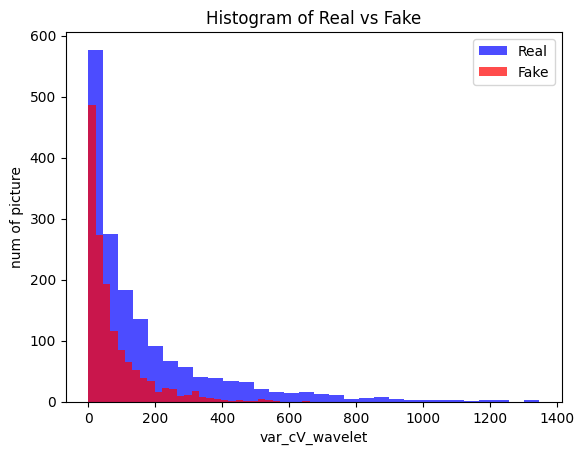

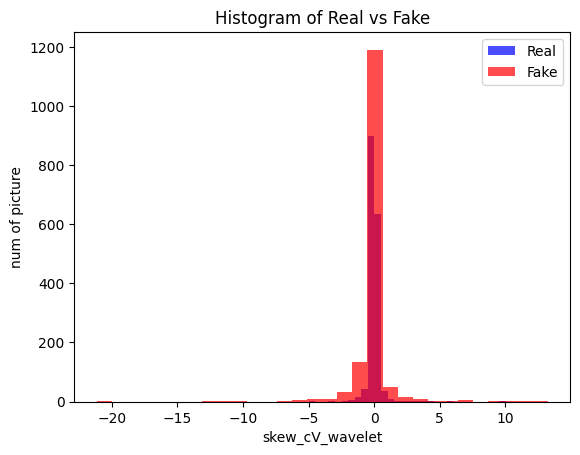

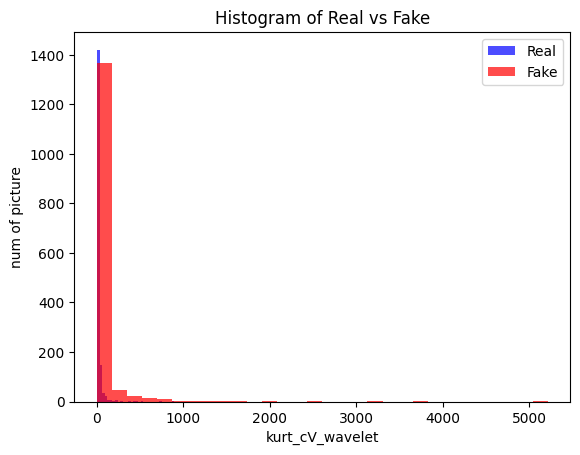

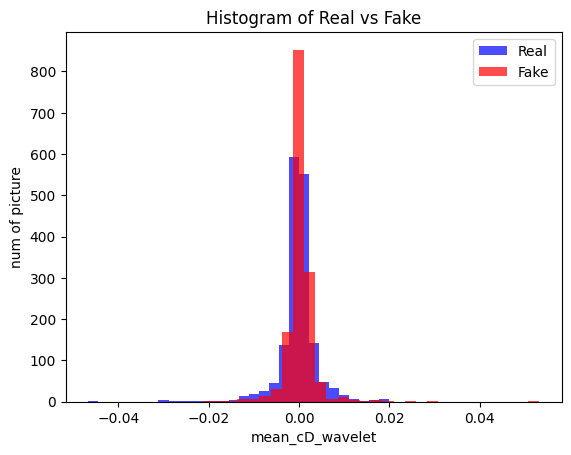

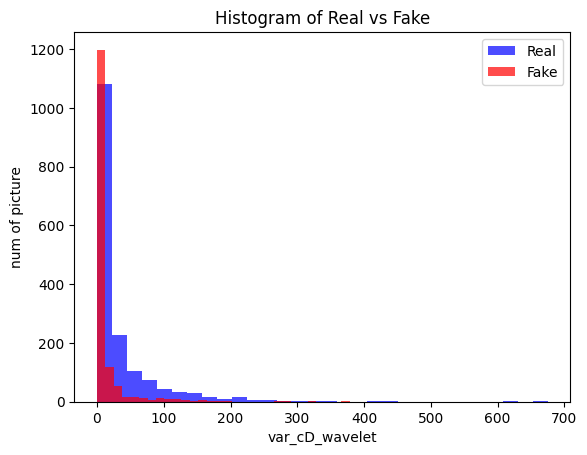

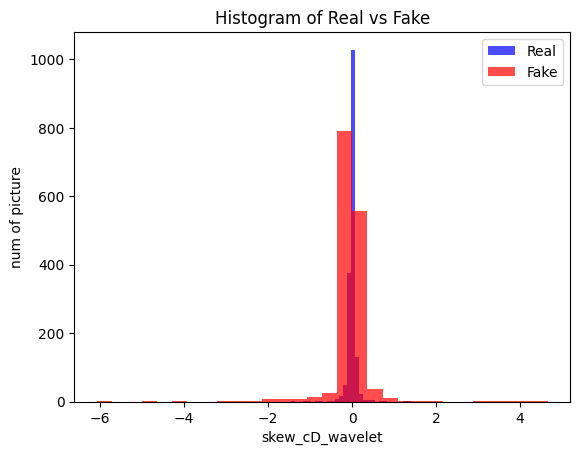

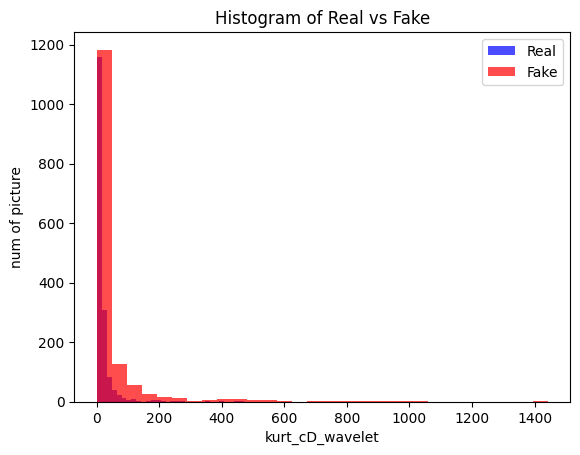

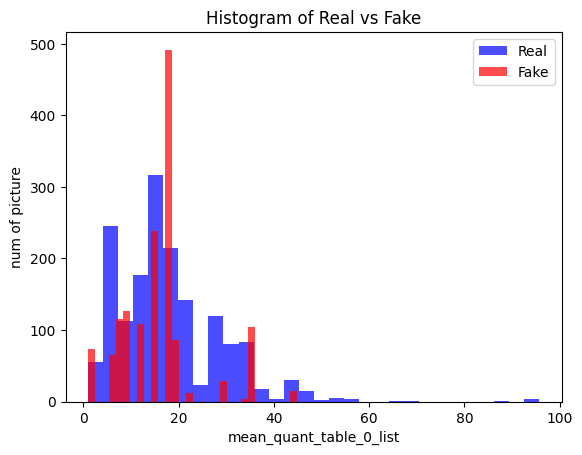

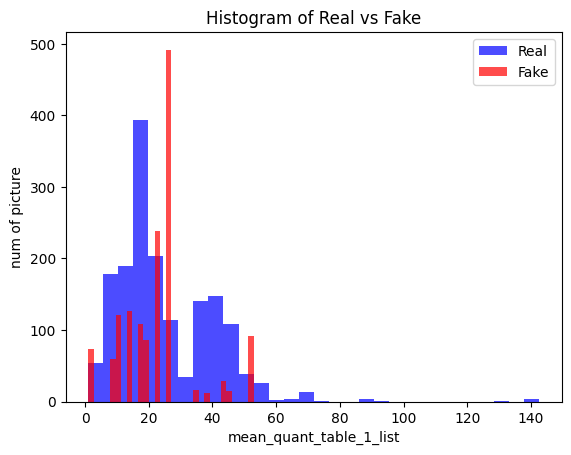

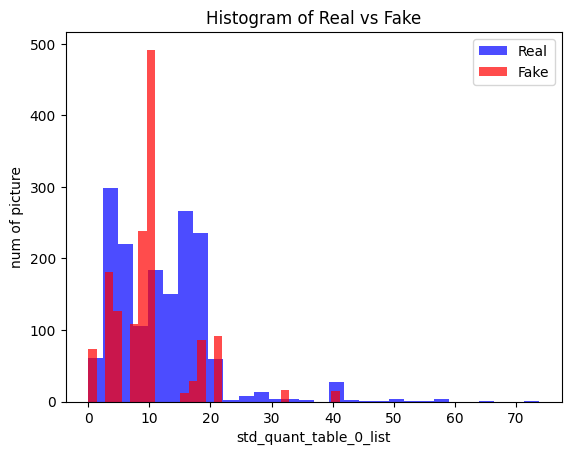

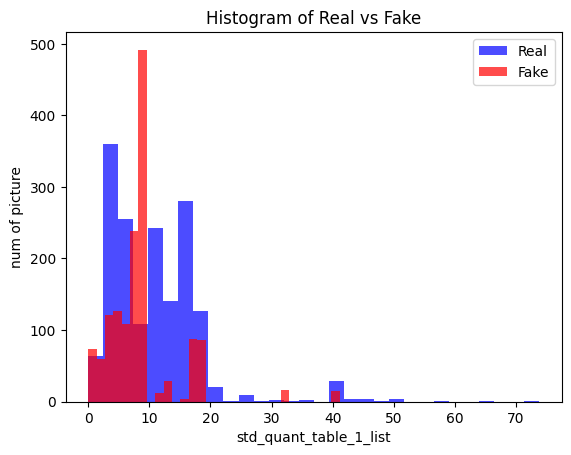

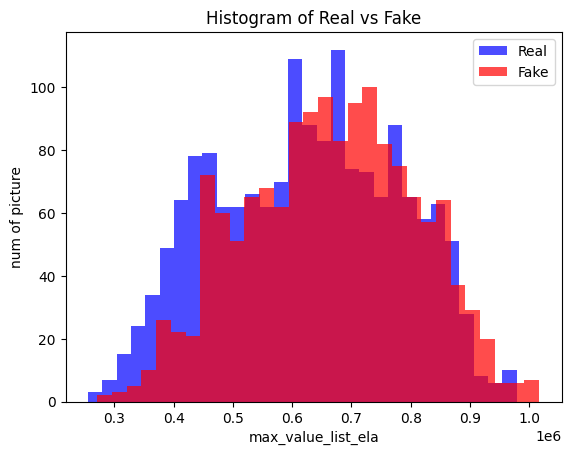

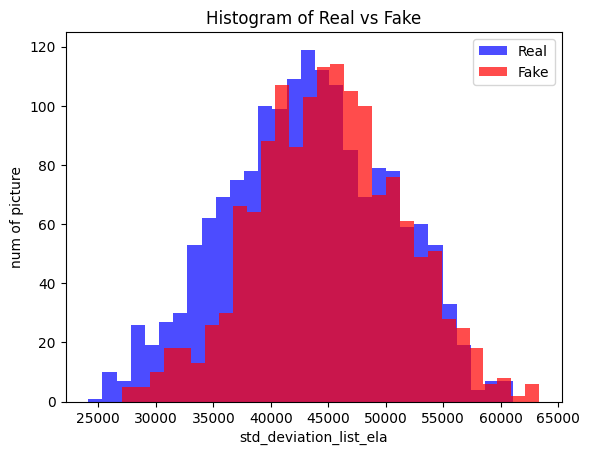

In [174]:


for i in X.head():
  try:
    plot_histogram(X[i].tolist(), y.tolist() , i)
  except:
       print(f"Skipped invalid feature = { i }")

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

[[652  34]
 [ 49 204]]


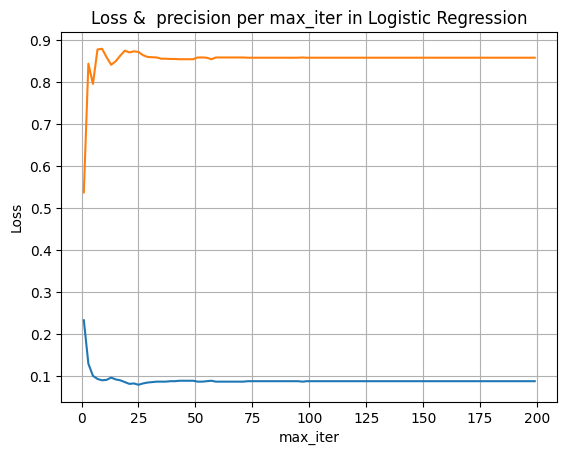

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


# Initialize an instance of Logistic Regression
lr = LogisticRegression()

# Create an array of max_iter values to test
max_iters = np.arange(1, 200, 2)

losses = []  # To store the loss for each max_iter
precision_list = []
# Fit the model and calculate loss for each max_iter value
for max_iter in max_iters:
    lr.set_params(max_iter=max_iter)  # Set the max_iter parameter
    lr.fit(X_train, y_train)  # Fit the logistic regression model
    y_pred = lr.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    error = (fp + fn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    precision_list.append(precision)
    losses.append(error)

print(confusion_mat)
# Plotting the loss per max_iter
plt.plot(max_iters, losses)
plt.plot(max_iters, precision_list)
plt.xlabel('max_iter')
plt.ylabel('Loss')
plt.title('Loss &  precision per max_iter in Logistic Regression')
plt.grid(True)
plt.show()


c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScale

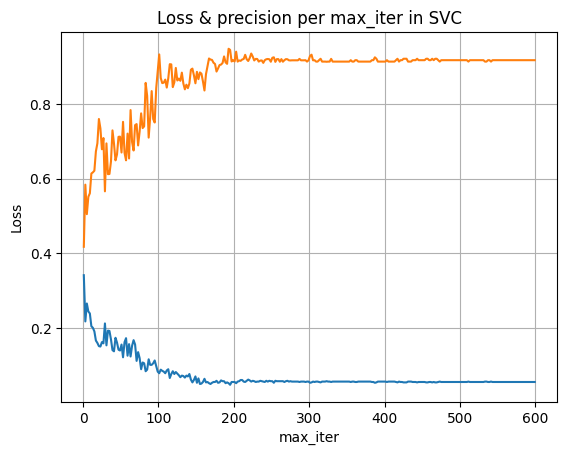

In [177]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Initialize an instance of Logistic Regression
svc = SVC()

# Create an array of max_iter values to test
max_iters = np.arange(1, 600, 2)

losses = []  # To store the loss for each max_iter
precision_list = []

# Fit the model and calculate loss for each max_iter value
for max_iter in max_iters:
    svc.set_params(max_iter=max_iter)  # Set the max_iter parameter
    svc.fit(X_train, y_train)  # Fit the SVC model
    y_pred = svc.predict(X_test)# Calculate the loss (accuracy in this case)
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    error = (fp + fn) / (tp + tn + fp + fn)
    losses.append(error)  # Append the loss
    precision = tp / (tp + fp)
    precision_list.append(precision)

# Plotting the loss per max_iter
plt.plot(max_iters, losses, label = "loss")
plt.plot(max_iters, precision_list, label = "precision")

plt.xlabel('max_iter')
plt.ylabel('Loss')
plt.title('Loss & precision per max_iter in SVC')
plt.grid(True)
plt.show()
